<a href="https://colab.research.google.com/github/ploybongkot/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data

2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

5.เขียน comments อธิบายทุกขั้นตอน

6.อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist

7.commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.


กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'พลอยบงกช แสงโทโพธิ์'
ID = '6230210514'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:16


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.039391,-2.387036,-3.497922,-5.328267,-8.678718,5.779481,4.693726,-9.039305,-6.856747,-3.051316,6.208178,-0.728674,-1.209568,-4.733171,0.827332,6.909030,10.460851,-7.759243,-0.127631,-9.629069,6.704932,3.139379,-4.774071,17.696893
1,-2.999958,-4.629015,-10.804170,7.985572,5.308159,8.399965,8.504110,-9.641025,5.591738,-8.668149,10.835163,4.685492,8.879597,6.214357,9.352480,4.336378,6.581569,-10.334358,2.683914,5.646710,6.793222,-11.571979,-9.258030,-55.859897
2,-2.283070,-3.935774,-8.418309,8.670313,9.549606,8.862807,8.557430,-9.420667,4.948781,-9.387406,9.019193,5.089031,8.126972,4.569491,8.980044,4.464475,6.643625,-11.016075,3.601535,8.752679,7.641445,-10.735928,-7.871548,-51.679641
3,-9.194473,-1.185524,-7.995901,-2.984028,7.249680,9.372627,-3.179537,-7.506007,7.405280,9.820167,-2.988439,-9.940277,-5.472871,7.402530,-9.224066,-3.228680,-4.187613,-6.418757,-7.754833,-10.555908,-7.064370,0.923576,-2.371048,6.617879
4,-9.444201,-1.702016,-9.139871,-5.528101,8.312870,9.514219,-3.243645,-8.603491,7.066946,10.185779,-2.530092,-10.427762,-7.104209,6.688527,-8.415212,-2.749131,-2.056412,-4.710402,-8.011179,-10.562339,-8.208584,0.777821,-3.404031,5.889103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570663,7.745031,3.332551,-0.131125,7.754660,5.628446,-9.137776,4.680007,2.081125,-0.116858,-2.020254,-1.964122,-5.301779,6.363146,4.393194,-5.639505,5.383566,4.412469,5.423917,-5.223493,-3.606812,-3.393692,15.490063,-14.968462
9996,-3.842826,7.761330,8.457160,5.945992,-1.103217,-7.615587,-3.665617,-5.104629,-3.402164,-1.193836,0.588533,-5.866029,4.177580,4.930785,9.306959,-5.063622,2.325805,1.291390,-1.833363,-2.649395,5.420599,1.574869,15.522659,9.874343
9997,-0.311583,-5.155992,-0.031352,-3.847010,-7.231104,5.254831,6.039680,-12.467927,-5.154640,-4.414190,4.902544,-1.413603,0.676148,-3.840611,3.680246,8.088712,8.842759,-10.749802,0.801560,-8.552788,8.095367,4.019561,-10.311985,22.097806
9998,-4.375030,6.055453,7.682048,6.146512,0.789055,-6.143570,-3.665225,-3.816322,-4.300116,0.127750,1.098119,-5.090588,7.040712,4.018777,7.543468,-4.984854,1.728996,1.402700,-0.007905,-2.044807,5.931352,1.403840,12.110906,9.019200


# clustering

In [6]:
Data.shape

(10000, 24)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape

(24, 24)

#### Kmean

##### Import

In [10]:
from sklearn.cluster import KMeans

##### Define

In [11]:
kmeans = KMeans(random_state=2021)

##### Fit - Transform

In [12]:
kmeans.fit(Data) # เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_

array([[-2.85948735e+00, -4.87325277e+00, -5.97566922e+00,
        -5.17517341e-01,  8.04617973e+00,  8.39356118e-01,
        -1.00110097e+00, -4.73106633e+00,  3.32891575e+00,
         6.22381223e+00,  9.86448583e-02, -2.87812870e+00,
        -1.65170876e+00,  2.31487686e+00, -4.38840717e+00,
         9.27079352e-01, -5.64030895e+00, -3.28697926e+00,
        -4.41429977e+00, -3.32807147e+00, -4.58421637e+00,
         3.97059025e+00, -9.74650554e+00,  2.18529512e+01],
       [-1.20337136e-01, -4.51431767e+00,  6.24131922e+00,
        -3.23424896e+00, -6.09072172e+00, -3.16912334e+00,
         3.39099802e+00, -4.41127612e+00, -4.70484952e+00,
         7.63516033e+00,  8.03168286e-01,  4.90019774e+00,
         7.89477681e+00, -4.52592577e+00,  5.84201257e-01,
        -7.27946834e+00,  9.15341087e+00,  6.24224747e+00,
         3.03227025e+00, -5.87822947e+00,  9.40920695e+00,
        -9.25472757e+00, -9.02863534e+00, -4.42736379e+01],
       [ 8.85733419e+00,  3.30416706e+00,  5.20885447e

#### ทดสอบการจัดกลุ่มของ Data

In [14]:
y = kmeans.predict(Data)
y

array([6, 4, 4, ..., 6, 5, 5], dtype=int32)

## ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป

###### Import

In [16]:
from sklearn.decomposition import PCA

##### Define

In [17]:
pca = PCA(n_components=2)

#####  Fit - Transform

In [19]:
new_pca = pca.fit_transform(Data)

In [20]:
new_pca.shape # จะเห็นว่า dimension เหลือเเค่ 2 dimension

(10000, 2)

In [21]:
from matplotlib import pyplot as plt

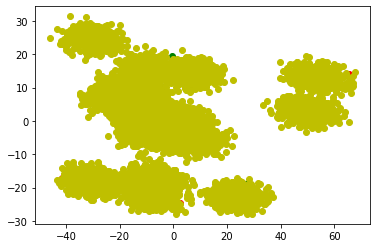

In [22]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

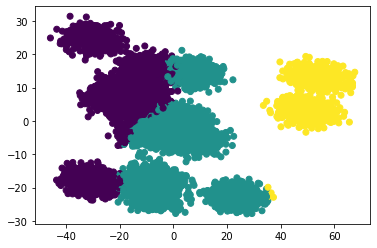

In [23]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

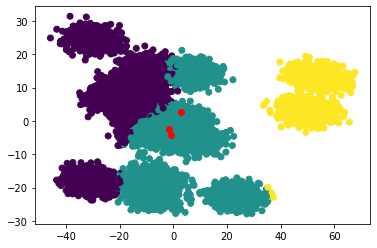

In [24]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

หลังจากนั้น จะทำการหาค่า k ว่าควรจะเป็นเท่าไหร่ โดบการใช้ Elbow Method ในการช่วยหาค่า k ที่เหมาะสม


##### SSE (Sum of Squared Errors)
SSE คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

In [25]:
kmeans.inertia_

7893793.770690319

In [26]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [27]:
SSE

[13781913.857352642,
 9531047.93527796,
 7893793.770690319,
 6909815.866515603,
 5921999.64541768,
 5212367.236653116,
 4637506.289524077,
 4108690.5643300726]

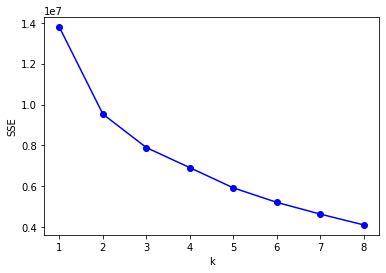

In [28]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') 
plt.xlabel('k')
plt.ylabel('SSE');

## Silhouette coefficient 

In [29]:
from sklearn import metrics

In [30]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

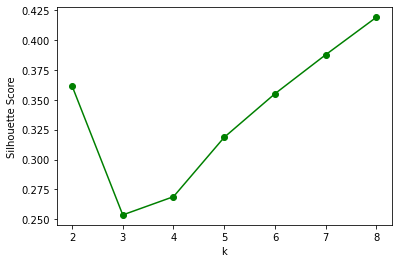

In [31]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') # ทำการ Silhouette ดีที่สุดที่ คือ 2
plt.xlabel('k')
plt.ylabel('Silhouette Score');